# exploratory notebook
analysing and tracking trends in energy consumption in Montpilier and the weather.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Initial Look
Since my goal is to find some connection to the energy consumption and weather trends I'd first like to get these two data sets on the same plot.  I first look might reveal some obvious connection.

To do this I'll first drop the weather data for year's that carn't included in the energy report.

While I'm working with the weather data I'll preform some initial decomposition.  Weather is season, in a statistical sense that means cyclical trends make it hard to analyse.  Do deal with this I will smooth out the data some and get a better average of what the weather is doing.

In [3]:
temps = pd.read_csv("Monthly_Average_Highs_and_Lows_6_1948_-_6_2015.csv")
temps['Date'] = pd.to_datetime(temps['Date'])
temps.set_index(['Date'], inplace=True)
temps.sort_values(['Date'], inplace=True)
temps.head()

In [5]:
temps = temps["2006-01-01":"2011-12-31"]
temps['Range'] = temps['Max Temp F'] - temps['Min Temp F']
temps['Median'] = temps['Range']/2 + temps['Min Temp F']

In [6]:
temps.tail()

,Max Temp F,Min Temp F,Range,Median
Date,,,,
2011-08-01,77.3,55.4,21.9,66.35
2011-09-01,71.1,52.2,18.9,61.65
2011-10-01,56.3,39.6,16.7,47.95
2011-11-01,51.7,29.5,22.2,40.60
2011-12-01,35.8,17.8,18.0,26.80


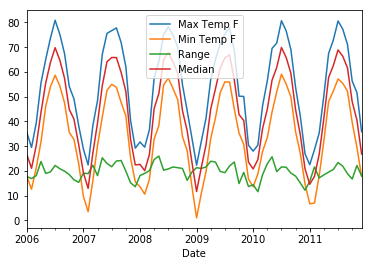

In [7]:
temps.plot();

In [8]:
temps.shape

(72, 4)

### Searching for Seasonality
As we will be considering changes in climate and how energy usage could be affected by it will first be nessisary to check for trends in the temps we recieved.
The following cells will be used to check for any annual chance in tempurature.

In [10]:
temps_copy = temps.copy()
temps_copy['Min Rol'] = temps_copy['Min Temp F'].rolling(window = 12).mean()
temps_copy['Max Rol'] = temps_copy['Max Temp F'].rolling(window = 12).mean()
temps_copy['Stationary Max'] = temps_copy['Max Temp F'] - temps_copy['Max Rol']
temps_copy['Stationary Min'] = temps_copy['Min Temp F'] - temps_copy['Min Rol']

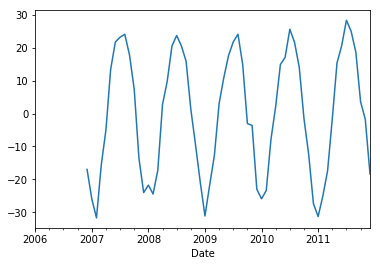

In [11]:
temps_copy['Stationary Max'].plot();

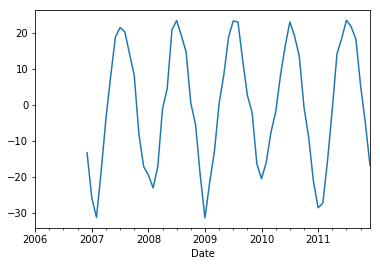

In [12]:
temps_copy['Stationary Min'].plot();

The above two plots look very 'wave like' with not much of a trend suggesting that tempuratures have mostly stayed the same for these five years.  Small differences can be found such as 2008 and 2010 have less extreme temps and 2011 has maybe slightly higher temps but the data stops before we can clearly establish a trend.

In [14]:
idx = pd.DataFrame(temps.index, columns = ['Date'])

In [65]:
energy = pd.read_csv("2006-2011_Town_Energy_Usage_And_Savings.csv")

In [66]:
energy  = energy[energy['TOWN'] == 'MONTPELIER']


In [67]:
# values are a summary of the previoius year.  To align properly with the weather data some transformations should done.
energy['Date'] = energy['Year'].apply(lambda x : x.split()[0])
energy['Date_'] = energy['Date'].apply(lambda x : int(x.split('/')[2]) - 1)

In [68]:
energy['Date'] = pd.to_datetime(energy['Date'])
energy['%Savings_as_Float'] = energy['Savings as % of Usage'] * 0.01

energy.head()

,TOWN,Year,kWh Usage: Commercial,kWh Usage: Residential,kWh Savings: Commercial,kWh Savings: Residential,Number of Households,Average Residential kWh Usage/ Household,Average Residential kWh Savings/ Household,Savings as % of Usage,MMBtu Savings: Commercial,MMBtu Savings: Residential,Date,Date_,%Savings_as_Float
171,MONTPELIER,01/01/2011 12:00:00 AM,56889842.0,25366180,591986.0,1455218.0,4354,5826.0,334,6.0,295.0,1960.0,2011-01-01,2010,0.06
464,MONTPELIER,01/01/2010 12:00:00 AM,58431419.0,25734114,1577982.0,1510065.0,4390,5862.0,344,6.0,3138.0,2814.0,2010-01-01,2009,0.06
712,MONTPELIER,01/01/2009 12:00:00 AM,56105680.0,27808949,1535823.0,1100560.0,4801,5792.0,229,4.0,2953.0,4073.0,2009-01-01,2008,0.04
960,MONTPELIER,01/01/2008 12:00:00 AM,55623865.0,27935716,1757831.0,2916177.0,4999,5588.0,583,9.0,NaN,NaN,2008-01-01,2007,0.09
1208,MONTPELIER,01/01/2007 12:00:00 AM,56439680.0,28704154,505129.0,1548356.0,4999,5742.0,310,5.0,NaN,NaN,2007-01-01,2006,0.05


In [69]:
energy.shape

(5, 15)

In [120]:
sparse_df = pd.merge(idx, energy, on='Date', how='left')

In [121]:
sparse_df.set_index(['Date'], inplace=True)

In [122]:
sparse_df.columns

Index(['TOWN', 'Year', 'kWh Usage: Commercial', 'kWh Usage: Residential',
       'kWh Savings: Commercial', 'kWh Savings: Residential',
       'Number of Households', 'Average Residential kWh Usage/ Household',
       'Average Residential kWh Savings/ Household', 'Savings as % of Usage',
       'MMBtu Savings: Commercial', 'MMBtu Savings: Residential', 'Date_',
       '%Savings_as_Float'],
      dtype='object')

In [123]:
sparse_df.loc['2007-01-01':'2007-01-01']

,TOWN,Year,kWh Usage: Commercial,kWh Usage: Residential,kWh Savings: Commercial,kWh Savings: Residential,Number of Households,Average Residential kWh Usage/ Household,Average Residential kWh Savings/ Household,Savings as % of Usage,MMBtu Savings: Commercial,MMBtu Savings: Residential,Date_,%Savings_as_Float
Date,,,,,,,,,,,,,,
2007-01-01,MONTPELIER,01/01/2007 12:00:00 AM,56439680.0,28704154.0,505129.0,1548356.0,4999.0,5742.0,310.0,5.0,NaN,NaN,2006.0,0.05


In [124]:
sparse_df['kWh Commercial in 10 millions'] = sparse_df['kWh Usage: Commercial']/10000000
sparse_df['kWh Residential in 10 millions'] = sparse_df['kWh Usage: Residential']/10000000
sparse_df['Avg Residential kWh usage in thousands'] = sparse_df['Average Residential kWh Usage/ Household']/1000
sparse_df['Avg Residential kWh savings in hundreds'] = sparse_df['Average Residential kWh Savings/ Household']/100
sparse_df['MMBtu Savings: Commercial in thousands'] = sparse_df['MMBtu Savings: Commercial']/1000
sparse_df['MMBtu Savings: Residential in thousands'] = sparse_df['MMBtu Savings: Residential']/1000

In [125]:
sparse_df = sparse_df.bfill()

In [126]:
sparse_df.drop(['Year', 'kWh Usage: Commercial', 'kWh Usage: Residential', 'Average Residential kWh Usage/ Household', 'Average Residential kWh Savings/ Household'], axis=1, inplace=True)

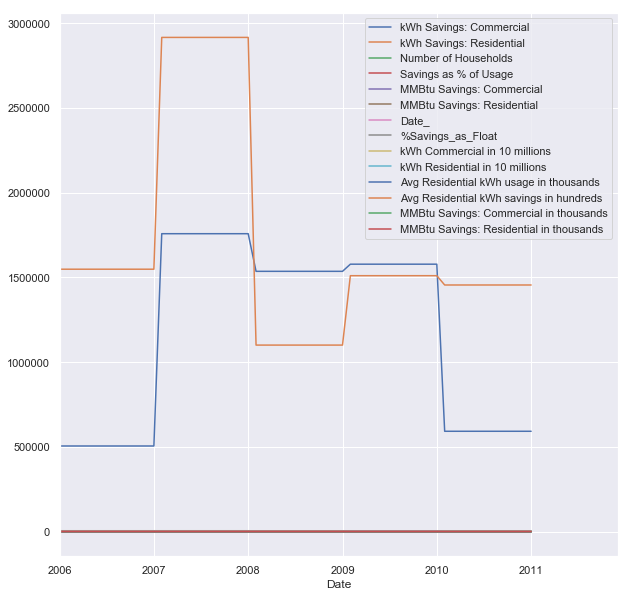

In [127]:
sparse_df.plot(figsize=(10,10));

this plot is hard to read.  Let's scales some values to make it more manageable

In [128]:
temps_for_sparse = temps.apply(lambda x: x/10)
temps_for_sparse.head()

,Max Temp F,Min Temp F,Range,Median
Date,,,,
2006-01-01,3.55,1.78,1.77,2.665
2006-02-01,2.95,1.26,1.69,2.105
2006-03-01,3.94,2.13,1.81,3.035
2006-04-01,5.55,3.17,2.38,4.360
2006-05-01,6.50,4.60,1.90,5.550


In [129]:
joined_df = pd.merge(temps_for_sparse, sparse_df, on='Date', how='left')
joined_df.drop(['kWh Savings: Commercial', 'kWh Savings: Residential', 'Date_', '%Savings_as_Float', 'Median', 'Range', 'Number of Households', 'MMBtu Savings: Residential', 'MMBtu Savings: Commercial'], axis=1, inplace=True)
joined_df.dropna(inplace=True)

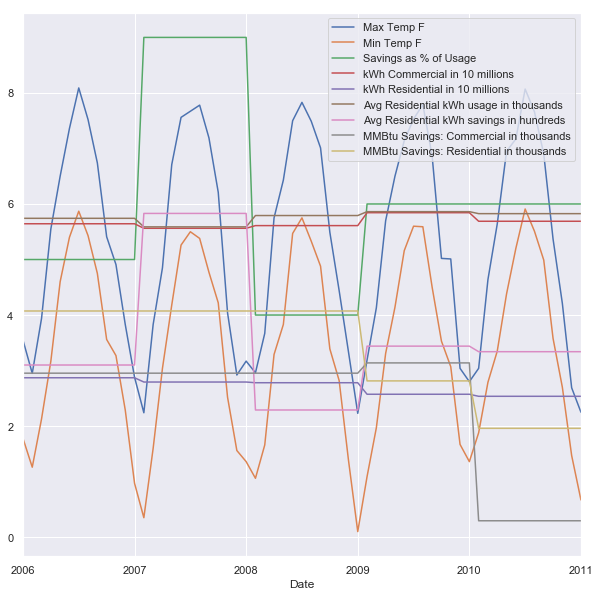

In [130]:
joined_df.plot(figsize=(10,10));

#### What a mess!
Not only is there too much information going on here but there also doesnt seem to be any obvious trends.  We'll have to dig deeper and return to this data with a more well-informed view point.

In [82]:
# things id like to know
# temp should be on a more sensitive scale / 10
# overlay an alpha=.5 bar of the energy data over the temp data
# look at just commercial and residential v temps
# stack commercial and residential (stack savings MM(million) *BTU is equivalent to1.06 Joules) (or take savings % and create a new col)
# ts manipulation of temp data to remove seasonality
# box the energy data into a larger plot of temp data


In [84]:
# overlay houses as line plot as an estimate of population
# group bars to show percent saved alongside
sns.set()
consumption = pd.DataFrame()
consumption['Adjusted_Houses'] = energy['Number of Households']/1000
consumption['kWh Commercial'] = energy['kWh Usage: Commercial']
consumption['kWh Residential'] = energy['kWh Usage: Residential']
consumption['Date'] = energy['Date_']

total_consumption = consumption.apply(lambda x: (x['kWh Commercial'] + x['kWh Residential']), axis=1)
savings = total_consumption * energy['%Savings_as_Float']
consumption['Total Usage'] = total_consumption
consumption['KWh Savings'] = savings
consumption = consumption[::-1]

consumption.head()

,Adjusted_Houses,kWh Commercial,kWh Residential,Date,Total Usage,KWh Savings
1208,4.999,56439680.0,28704154,2006,85143834.0,4257191.70
960,4.999,55623865.0,27935716,2007,83559581.0,7520362.29
712,4.801,56105680.0,27808949,2008,83914629.0,3356585.16
464,4.390,58431419.0,25734114,2009,84165533.0,5049931.98
171,4.354,56889842.0,25366180,2010,82256022.0,4935361.32


Text(0, 0.5, 'kWh in Millions')

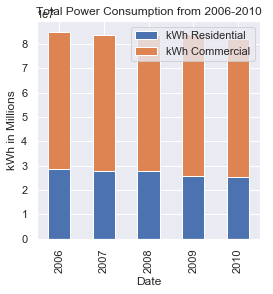

In [85]:
ax = consumption.loc[:,['kWh Residential', 'kWh Commercial', 'Date']].set_index('Date').plot(kind='bar', stacked=True, title='Total Power Consumption from 2006-2010', figsize=(4,4))
ax.set_ylabel('kWh in Millions')

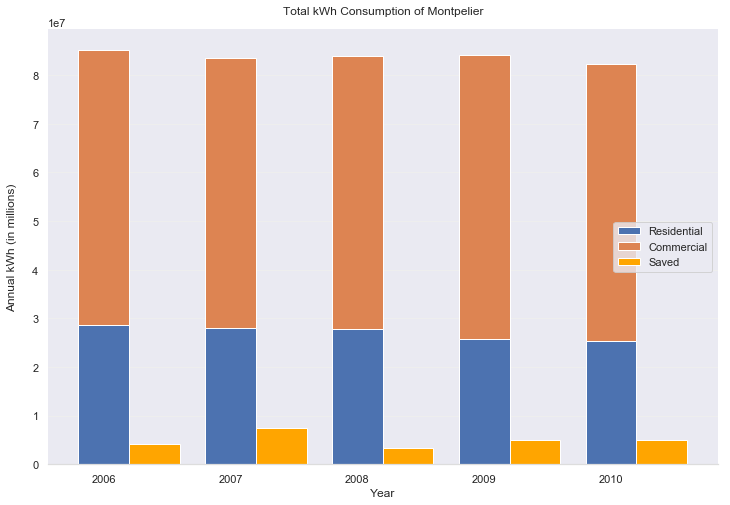

In [136]:
# add population

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(consumption.Date.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
# ind = np.arange(N)    # the x locations for the groups

b1 = ax.bar(x, consumption['kWh Residential'], bar_width)
b2 = ax.bar(x, consumption['kWh Commercial'], bar_width,
             bottom=consumption['kWh Residential'])
# b4 = ax.plot(energy['Number of Households'])

ax.set_ylabel('Annual kWh (in millions)', labelpad=15)
ax.set_title('Total kWh Consumption of Montpelier', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(consumption.Date.unique())
ax.set_xlabel('Year')

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


b3 = ax.bar(x + bar_width, consumption['KWh Savings'],
            width=bar_width, color = 'orange')
ax.legend((b1[0], b2[0], b3[0]), ('Residential', 'Commercial', 'Saved'), loc='right')
plt.savefig('Montpelier_energy_consumption.png')
plt.show()

In [132]:
long_temps = pd.read_csv("Monthly_Average_Highs_and_Lows_6_1948_-_6_2015.csv")
long_temps['Date'] = pd.to_datetime(long_temps['Date'])
long_temps.set_index(['Date'], inplace=True)
long_temps.sort_values(['Date'], inplace=True)
long_temps.tail()

,Max Temp F,Min Temp F
Date,,
2015-02-01,16.8,-6.1
2015-03-01,32.5,12.1
2015-04-01,50.0,29.5
2015-05-01,72.2,45.8
2015-06-01,69.2,47.6


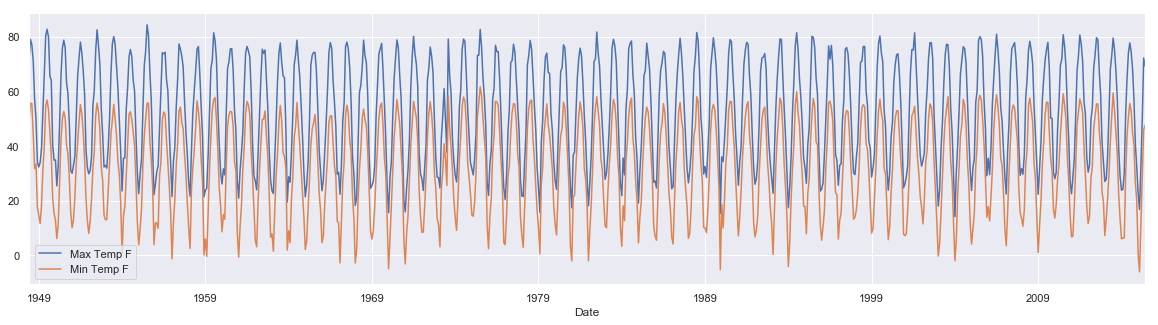

In [134]:
long_temps.plot(figsize=(20,5));

In [137]:
temps_copy = long_temps.copy()
temps_copy['Min Rol'] = temps_copy['Min Temp F'].rolling(window = 12).mean()
temps_copy['Max Rol'] = temps_copy['Max Temp F'].rolling(window = 12).mean()
temps_copy['Stationary Max'] = temps_copy['Max Temp F'] - temps_copy['Max Rol']
temps_copy['Stationary Min'] = temps_copy['Min Temp F'] - temps_copy['Min Rol']

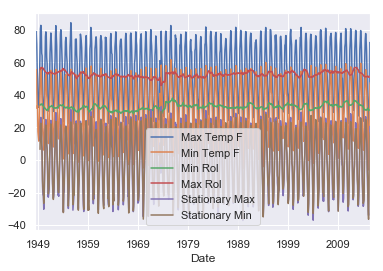

In [138]:
temps_copy.plot();